In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv('50_Startups.csv')
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [8]:
#Divide data into dependents vs independents
X = df.iloc[:,0].values # x = R&D Spend Column
y = df.iloc[:,-1].values # y = profit column

In [9]:
X

array([165349.2 , 162597.7 , 153441.51, 144372.41, 142107.34, 131876.9 ,
       134615.46, 130298.13, 120542.52, 123334.88, 101913.08, 100671.96,
        93863.75,  91992.39, 119943.24, 114523.61,  78013.11,  94657.16,
        91749.16,  86419.7 ,  76253.86,  78389.47,  73994.56,  67532.53,
        77044.01,  64664.71,  75328.87,  72107.6 ,  66051.52,  65605.48,
        61994.48,  61136.38,  63408.86,  55493.95,  46426.07,  46014.02,
        28663.76,  44069.95,  20229.59,  38558.51,  28754.33,  27892.92,
        23640.93,  15505.73,  22177.74,   1000.23,   1315.46,      0.  ,
          542.05,      0.  ])

In [10]:
y

array([192261.83, 191792.06, 191050.39, 182901.99, 166187.94, 156991.12,
       156122.51, 155752.6 , 152211.77, 149759.96, 146121.95, 144259.4 ,
       141585.52, 134307.35, 132602.65, 129917.04, 126992.93, 125370.37,
       124266.9 , 122776.86, 118474.03, 111313.02, 110352.25, 108733.99,
       108552.04, 107404.34, 105733.54, 105008.31, 103282.38, 101004.64,
        99937.59,  97483.56,  97427.84,  96778.92,  96712.8 ,  96479.51,
        90708.19,  89949.14,  81229.06,  81005.76,  78239.91,  77798.83,
        71498.49,  69758.98,  65200.33,  64926.08,  49490.75,  42559.73,
        35673.41,  14681.4 ])

In [11]:
# Train Test Split

from sklearn.model_selection import train_test_split
X_train , X_test, y_train, y_test = train_test_split(X,y,train_size = 0.8,test_size = 0.2 )

In [12]:
len(X_test)

10

In [13]:
len(X_train)

40

In [15]:
X_train = X_train.reshape(-1, 1)
X_test = X_test.reshape(-1,1)
#.reshape(-1, 1) is used: to convert 1D input into a 2D column vector.
#[170, 180, 160, 175] - [[170],[180],[160],[175]]

In [ ]:
# Feature Scaling

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)




on training data we do fit transform
on testing data we do transform

because testing data is being transformed with the same details that we use for training data like mean, SD, min, max.

In [23]:
X_test

array([[ 1.90306395],
       [ 0.64252456],
       [-1.76228978],
       [-0.66312399],
       [ 2.18751042],
       [-1.73839666],
       [-0.19513047],
       [ 1.35022349],
       [-0.70956321],
       [-1.07758054]])

In [24]:
X_train

array([[-0.21760324],
       [ 0.05923407],
       [-0.65328109],
       [ 0.49884525],
       [ 0.43519022],
       [-1.73086657],
       [-0.84121844],
       [ 1.18388797],
       [ 1.68642466],
       [-1.09599408],
       [-1.23251618],
       [-0.30188667],
       [ 1.63231751],
       [ 0.11024873],
       [-0.43667094],
       [ 1.11718511],
       [ 0.67217197],
       [ 0.07810888],
       [ 0.10125838],
       [-1.07541704],
       [-0.03981025],
       [-0.18447564],
       [ 0.97340763],
       [-1.19756404],
       [ 1.10286973],
       [ 1.45335427],
       [-1.27905286],
       [-0.24760252],
       [ 0.30207187],
       [ 0.00526475],
       [-1.76228978],
       [ 1.38793656],
       [-0.2813887 ],
       [ 0.42938003],
       [-0.14909782],
       [-1.7493415 ],
       [ 2.12178361],
       [ 0.03713825],
       [ 0.47989257],
       [-1.39189467]])

In [25]:
# Create LR Model

from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [26]:
# Predictions

y_pred = regressor.predict(X_test)

In [27]:
y_pred

array([179580.45739404, 134016.80418237,  47092.0099861 ,  86822.62830964,
       189862.10386842,  47955.65450935, 103738.79472286, 159597.4001107 ,
        85144.02897917,  71841.61691629])

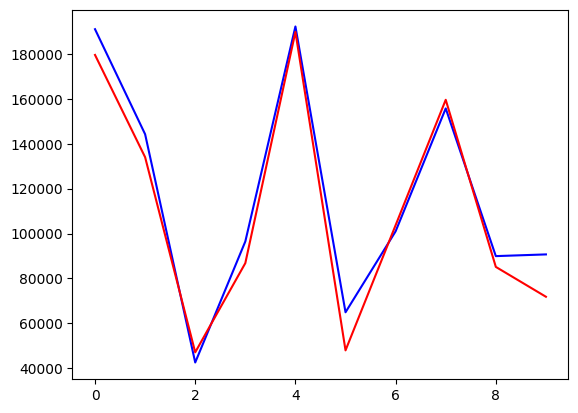

In [28]:
# Plotting of y_test vs y_pred

plt.plot(y_test, color ='blue',label ='test')
plt.plot(y_pred, color ='red',label ='predictions')
plt.show()

1. Train_test split
2. Feature Scaling
3. Calling Model

model = LinearRegression()
model.fit(X_train,y_train)

y_pred = regressor.predict(X_test)


### Regression Metrics Start

we have y_test and y_pred data

In [29]:
from sklearn.metrics import mean_absolute_error , mean_squared_error, r2_score

In [32]:
mae = mean_absolute_error(y_test,y_pred)
print (mae)

8552.248066037848


In [34]:
mse = mean_squared_error(y_pred,y_test)
print(mse)

104531583.75482082


In [35]:
rmse = np.sqrt(mse)
print(rmse)

10224.068845367818


In [ ]:
r2 = r2_score(y_pred,y_test)
print(r2) #good

0.9576968213464032


In [37]:
# Adjusted r Squared

n = X_test.shape[0] #rows
k = X_test.shape[1] #cols

adjusted_r2 = 1- (1-r2)*(n-1)/(n-k-1)
print(adjusted_r2)

0.9524089240147036
